___
# MINIPROJETO 1

## <font color='red'>Frederico Vilela Curti</font>
___

## <font color='blue'>HP dos Pokémons</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/fredcurti/CD/Miniprojeto 1


In [2]:
#1)
pokemon = pd.read_excel("pokemondb.xls")

In [3]:
#2)
pokemon.columns = pokemon.columns.str.replace('POKEMON ','POKEMON')
pokemon = pokemon[pokemon.POKEMON.notnull()]
pokemon = pokemon[pokemon.FORM != "Mega"][pokemon.FORM != "Mega X"][pokemon.FORM != "Mega Y"]
pokemon.columns = pokemon.columns.str.replace('BASE STATS','HP')
pokemon.columns = pokemon.columns.str.replace('Unnamed: 13','ATK')
pokemon.columns = pokemon.columns.str.replace('Unnamed: 14','DEF')
pokemon.columns = pokemon.columns.str.replace('Unnamed: 15','SP.ATK')
pokemon.columns = pokemon.columns.str.replace('Unnamed: 16','SP.DEF')
pokemon.columns = pokemon.columns.str.replace('Unnamed: 17','SPEED')
pokemon.columns = pokemon.columns.str.replace('Unnamed: 18','TOTAL')
pokemon.drop(pokemon.columns[[9,10,11]], axis=1, inplace=True)
pokemon = pokemon.reset_index()
pokemon2 = pokemon.iloc[:,2:16]
pokemon = pokemon2

/Users/fredcurti/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


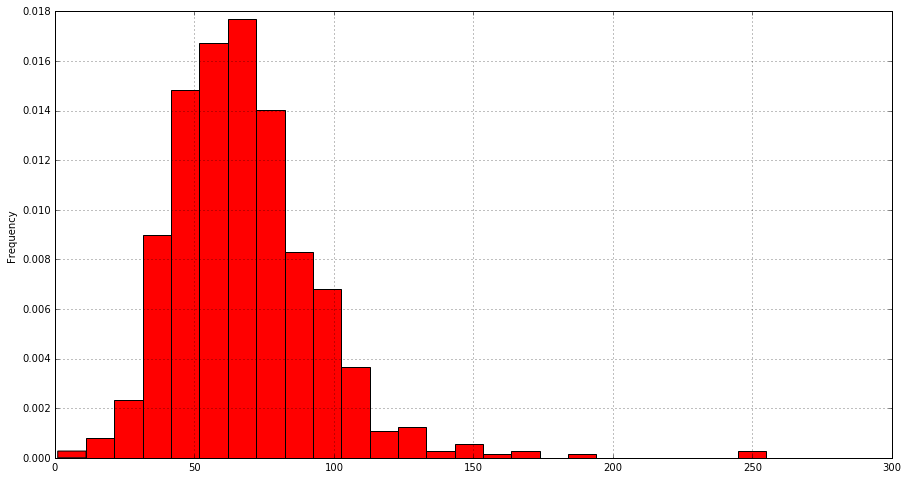

In [4]:
#3) 
pokemon.HP.plot.hist(bins=25,normed=True,grid=True,figsize=(15,8),color="r")

___
### Itens 4 a 6 - Resolução:

4) Aparentemente os dados estão distribuídos de maneira log-normal ,boltzmann,negativa-binomial,planck ou de muitas outras,
mas para essa atividade escolherei duas: **normal e gamma**.

In [5]:
mean = pokemon.HP.mean()
std = pokemon.HP.std()
x = sorted(pokemon.HP)
kgama = 10

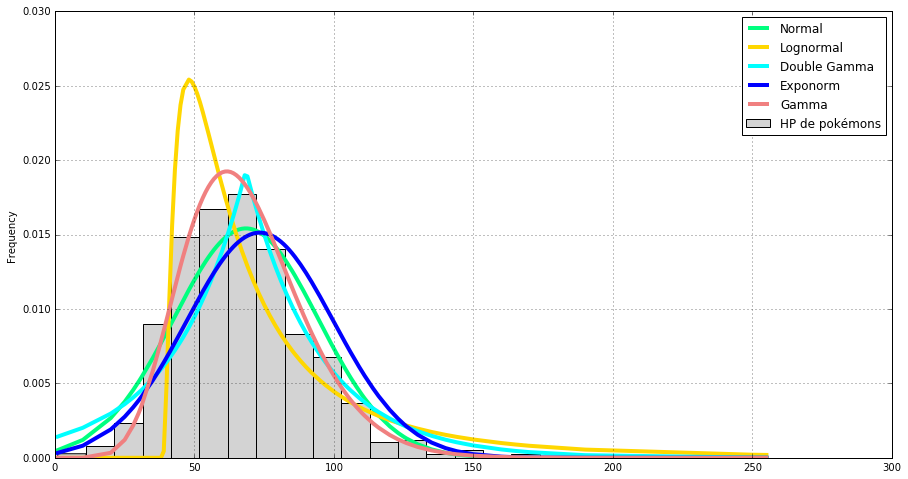

In [6]:
pokemon.HP.plot.hist(bins=25,normed=True,grid=True,figsize=(15,8),color="lightgrey",label="HP de pokémons").legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
normal = stats.norm.pdf(x,loc=mean, scale=std)
lognormal = stats.lognorm.pdf(x,1,loc=mean-30,scale=std)
boltz = stats.boltzmann.pmf(x, 1,1, loc=mean)
doublegamma = stats.dgamma.pdf(x,1, loc=mean, scale=std)
weibull= stats.dweibull.pdf(x,1.5,mean,std)
exponnorm = stats.exponnorm.pdf(x,0.2,mean,std)
gamma = stats.gamma.pdf(x,kgama,0,mean/kgama)
plt.plot(x,normal,lw="4",label="Normal",c="springgreen")
plt.plot(x,lognormal,lw="4",label="Lognormal",c="gold")
plt.plot(x,doublegamma,lw="4",label="Double Gamma",c="cyan")
plt.plot(x,exponnorm,lw="4",label="Exponorm")
plt.plot(x,gamma,lw="4",label="Gamma",c="lightcoral")
plt.legend(loc="best")

plt.show()

5) Os gráficos acima são resultado da tentativa de estimar os parâmetros de algumas distribuições, sendo a Lognormal e a Gamma as mais semelhantes

In [7]:
#6)

fg = stats.gamma.fit(pokemon.HP.astype(float))
fn = stats.norm.fit(pokemon.HP.astype(float))
# [0] = a , [1] = loc, [2] = scale
gamma2 = stats.gamma.pdf(x,fg[0],fg[1],fg[2])
normal2 = stats.norm.pdf(x,fn[0],fn[1])



___
### Itens 7 a 9 - Resolução:

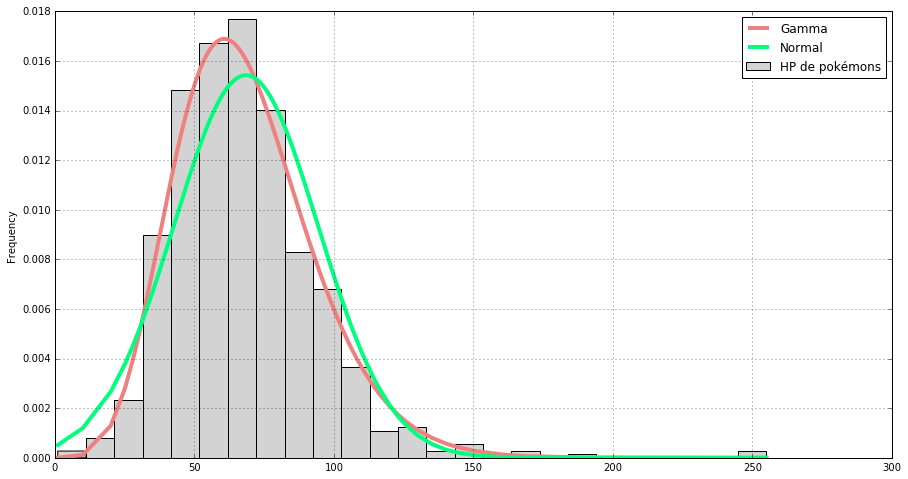

In [8]:
#7)

pokemon.HP.plot.hist(bins=25,normed=True,grid=True,figsize=(15,8),color="lightgrey",label="HP de pokémons").legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.plot(x,gamma2,lw="4",label="Gamma",c="lightcoral")
plt.plot(x,normal2,lw="4",label="Normal",c="springgreen")
plt.legend(loc="best")
plt.show()

**Aparentemente**, a função Gamma se encaixa melhor na distribuição com os parâmetros corretos. O mesmo comportamento pôde ser observado nas tentativas anteriores

**8) QQ PLOT**

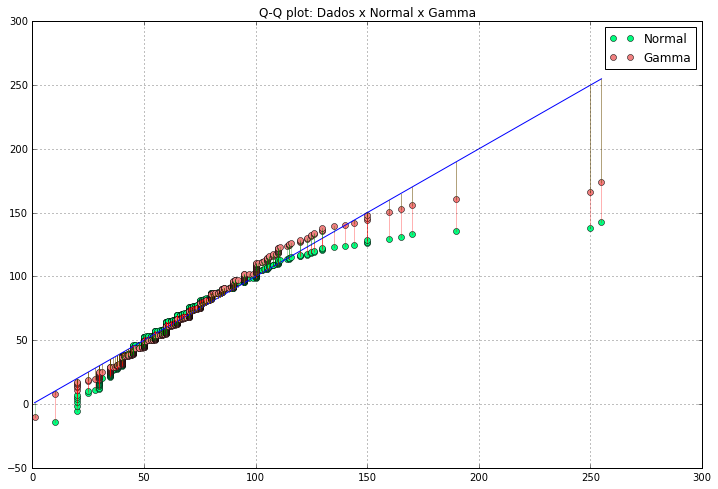

In [9]:
tempos = x
fra = []
for i in range(len(x)):
    acc = (i - 0.5) / len(x)
    if acc < 0:
        acc = 0
    fra.append(acc)
fra = pd.Series(data=fra)

q_exp = stats.norm.ppf(fra, fn[0],fn[1])
q_gamma = stats.gamma.ppf(fra, scale=fg[0], loc=fg[1], a=fg[2])
fig = plt.figure(figsize=(12,8))
plt.title("Q-Q plot: Dados x Normal x Gamma")
exp_plot, = plt.plot(tempos, q_exp, 'o', color="springgreen", label="Normal")
gamma_plot, = plt.plot(tempos, q_gamma, 'o', color="lightcoral", label = "Gamma")
plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')
plt.grid(True)

for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (q_exp[i], tempos[i]), '-', color='red', alpha=0.3  )
    plt.plot((tempos[i], tempos[i]), (q_gamma[i], tempos[i]), '-', color='green', alpha=0.3  )



**9)**

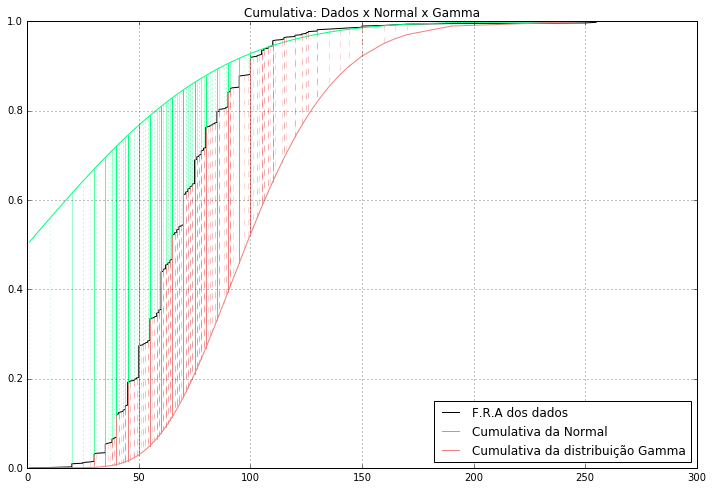

In [11]:
# fra e FDA
mu_exp= mean
theta_gamma = fg[0]
k_gamma = kgama
cdf_exponencial = stats.norm.cdf(tempos, scale=mu_exp) #FDA
cdf_gamma = stats.gamma.cdf(tempos, scale=theta_gamma, loc=0, a=k_gamma)

fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Normal x Gamma")

dados_fra_plot, = plt.plot(tempos, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(tempos, cdf_exponencial, '-', color='springgreen', label = "Cumulativa da Normal")
cdf_gamma_plot, = plt.plot(tempos, cdf_gamma, '-', color='lightcoral', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot],loc="lower right")
plt.grid(True)

for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_exponencial[i]), ':', color="springgreen", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="lightcoral", alpha=0.3)
    

___
### Itens 10 e 11 - Resolução:

10) Teste de aderência

**Erro quadrático**  

In [12]:
# Erro quadrático nas CDFs
erro_quad_cdf_exponencial = sum((fra - cdf_exponencial)**2)
erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)
print("Erro quadrático da CDF da Normal versus F.R.A", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)

Erro quadrático da CDF da Normal versus F.R.A 110.319106826
Erro quadrático da CDF da Gamma versus F.R.A 80.8509272417


**Diferenças absolutas**

In [13]:
# Diferenças absolutas
soma_difs_cdf_expoencial = sum(abs(fra - cdf_exponencial))
soma_difs_cdf_gamma = sum(abs(fra - cdf_gamma))
print("Erro da soma do módulo das diferenças da Normal versus F.R.A: {0} \nErro da soma do módulo das diferenças da Gamma versus F.R.A: {1}".format(soma_difs_cdf_expoencial, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da Normal versus F.R.A: 237.2826193744601 
Erro da soma do módulo das diferenças da Gamma versus F.R.A: 219.68134422319204


**Kolmogovor-Smirnov**

In [16]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_exp = max(abs(fra-cdf_exponencial))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))
print("Teste K-S para a normal com μ= {:4.2f} -> {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}  -> {:4.3f}".format(mu_exp, ks_aderencia_exp, theta_gamma, k_gamma, ks_aderencia_gamma))

Teste K-S para a normal com μ= 68.45 -> 0.662
Teste K-S para a gamma com scale=10.157, loc=0 e a=10.000  -> 0.495


11) 

In [23]:
comp = pd.read_excel("ex11.xlsx")
comp

,TIPO DE DISTRIBUICAO,ERRO QUADRATICO,DIFERENCAS ABSOLUTAS,KS
0,Normal,110.319107,237.282619,0.662
1,Gamma,80.850927,219.681344,0.495


Comparando ambos os tipos de funções de densidade de probabilidade, fica evidente que a distribuição Gamma é a mais adequada para a distribuição de HP dos pokémons, pois **ela apresenta o menor valor de erro para as 3 funções**

0 = Normal    |   1 = Gamma


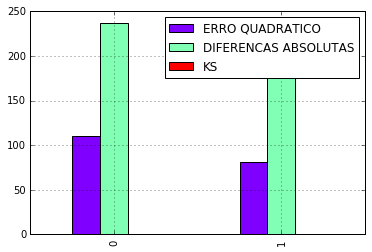

In [43]:
comp.plot.bar(colormap="rainbow",grid=True)
print("0 = Normal    |   1 = Gamma")

Como os valores de KS são muito pequenos, eles serão demonstrados no gráfico abaixo:

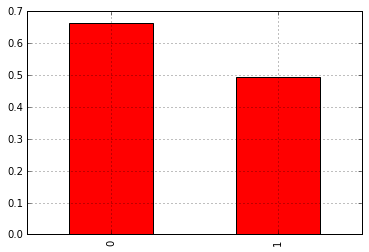

In [41]:
comp.KS.plot.bar(color="r",grid=True)